In [1]:

from __future__ import division
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import control
import control.matlab as mlab
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as sla
import scipy.integrate as integrate
from sympy import Matrix
import numpy.linalg as nla
import matplotlib as mpl
from _547utils import *
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=2)
lw=4
fs=20

## Reminder
### Continuous Time Controllability 
To check controllability there are three tests:
* matrix rank: $$\mathrm{rank}(\mathcal{C})=\mathrm{rank}\left(\begin{bmatrix} B & AB & \cdots  &A^{n-1}B\end{bmatrix}\right)=n?$$
* PBH: at $s\in \text{spec}(A)$, $$\mathrm{rank}\left(\begin{bmatrix} sI-A & B\end{bmatrix}\right)=n?$$
* Lyapunov test: if $A$ is stable, $(A,B)$ is controllable iff $\exists!\ W=W^\top >0$ s.t. $$AW+WA^\top=-BB^\top$$



### Continuous Time Observability
To check observability there are three tests:
* matrix rank: $$\mathrm{rank}(\mathcal{O})=\mathrm{rank}\left(\begin{bmatrix} C \\ CA\\ \vdots \\CA^{n-1}\end{bmatrix}\right)=n?$$
* PBH: at $s\in \text{spec}(A)$, $$\mathrm{rank}\left(\begin{bmatrix} sI-A\\ C\end{bmatrix}\right)=n?$$
* Lyapunov test: if $A$ is stable, $(C,A)$ is controllable iff $\exists!\ P=P^\top >0$ s.t. $$A^\top P+PA=-C^\top C$$

In [6]:
np.random.seed(30)
print(n)
p=2; m=2
A=np.random.rand(n,n)
#A=np.array([[-1, 0, 0, -1],
#            [0, -1, 0, 0],
#           [0, 0, -1, 0],
#           [-1, 0, 0, -1]])
C=np.random.rand(p,n)
C=np.array([[1, 1, 1, 0],[1,0,0,1]])
B=np.random.rand(n,m)
print("A :\n", A)
print("C :\n", C)
print("B :\n", B)
print("spec(A): \n", np.real(np.linalg.eig(A)[0]))

4
A :
 [[0.64 0.38 0.66 0.16]
 [0.96 0.35 0.99 0.24]
 [0.59 0.41 0.14 0.54]
 [0.52 0.77 0.93 0.09]]
C :
 [[1 1 1 0]
 [1 0 0 1]]
B :
 [[0.9  0.29]
 [0.56 0.38]
 [0.03 0.49]
 [0.83 0.37]]
spec(A): 
 [ 2.01  0.05 -0.32 -0.53]


In [7]:
# Test the detectability function
detect(A, C,verbose=True)
Wo=getObsMat(A,C)
isOBSV(Wo, n)
print(Wo)

is detectable?:  True
is CO   :   True
rank(O):  4
[[1.   1.   1.   0.  ]
 [1.   0.   0.   1.  ]
 [2.19 1.13 1.79 0.94]
 [1.16 1.15 1.6  0.25]
 [4.04 2.68 3.7  1.68]
 [2.92 1.68 2.36 1.35]
 [8.22 5.27 7.41 3.46]
 [5.59 3.69 5.19 2.28]]


### Find a $L$ that makes the observer have poles in the left half plane

In [13]:
L=control.place(A.T, C.T, [-2,  -0.62, -2.  , -1.  ])
print(L.T)
Ao=A-L.T@C
print(np.linalg.eig(Ao)[0])

[[ 2.43 -4.15]
 [ 0.49  1.93]
 [ 0.48  3.85]
 [-1.4   7.59]]
[-1.   -0.62 -2.   -2.  ]


### Find $K$ that stabilizes

In [14]:
K=control.place(A,B,[-4,-2,-7+2j, -7-2j])
print(K)
Ac=A-B@K
print(Ac)

[[  90.14   38.79    0.99 -109.46]
 [-146.92  -13.28   -6.13  162.83]]
[[-38.63 -30.82   1.52  52.31]
 [  6.18 -16.21   2.75  -0.24]
 [ 70.78   5.94   3.14 -77.01]
 [-20.81 -26.74   2.36  31.7 ]]


In [15]:
Afb=np.asarray(np.vstack((np.hstack((Ac,-B@K)),np.hstack((np.zeros((n,n)),Ao)))))
print(Afb)

[[-3.86e+01 -3.08e+01  1.52e+00  5.23e+01 -3.93e+01 -3.12e+01  8.61e-01
   5.21e+01]
 [ 6.18e+00 -1.62e+01  2.75e+00 -2.43e-01  5.22e+00 -1.66e+01  1.76e+00
  -4.78e-01]
 [ 7.08e+01  5.94e+00  3.14e+00 -7.70e+01  7.02e+01  5.53e+00  3.00e+00
  -7.75e+01]
 [-2.08e+01 -2.67e+01  2.36e+00  3.17e+01 -2.13e+01 -2.75e+01  1.42e+00
   3.16e+01]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.37e+00 -2.05e+00 -1.77e+00
   4.32e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.46e+00 -1.47e-01  4.98e-01
  -1.69e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -3.74e+00 -7.11e-02 -3.42e-01
  -3.31e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -5.67e+00  2.17e+00  2.33e+00
  -7.50e+00]]


In [19]:
f=lambda t,x: Afb@x
x0=np.random.rand(n+n)
x0=np.array([10,10,10,10,20,20,20,20])
print(x0)
t,x=feuler(f,T=10,t0=0,x0=x0,MAXITERS=None, dt=1e-2)

[10 10 10 10 20 20 20 20]


In [22]:
np.shape(x)

(1000, 8)

Text(0, 0.5, 'error')

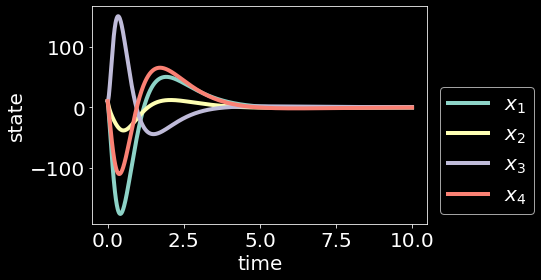

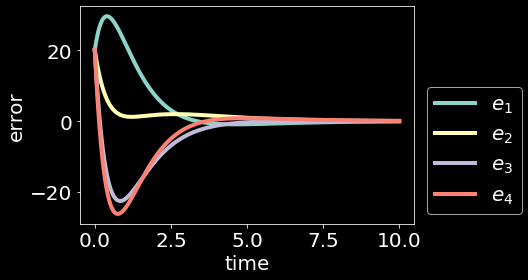

In [36]:
plt.figure(figsize=(6,4))
plt.style.use('dark_background')
labs=[r'$x_1$',r'$x_2$',r'$x_3$',r'$x_4$']
for j in range(4):
    plt.plot(t,x[:,j], label=labs[j], linewidth=4)

plt.legend(fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel('time', fontsize=20)
plt.ylabel('state', fontsize=20)

plt.figure(figsize=(6,4))
plt.style.use('dark_background')
labs=[r'$e_1$',r'$e_2$',r'$e_3$',r'$e_4$']
for j in range(4,8):
    plt.plot(t,x[:,j], label=labs[j-4], linewidth=4)

plt.legend(fontsize=20, loc=4, bbox_to_anchor=(1.35,0))
plt.tick_params(labelsize=20)
plt.xlabel('time', fontsize=20)
plt.ylabel('error', fontsize=20)

## Suggestions
- try plotting the original trajectory and compare
- try plotting the estimated state $\hat{x}$ instead of the error
- Play around with the dynamics